# Homework 4: Integration
Name: Aurelia Brook

## 1. 1D Integration with trapezoid rule
We want to evaluate the 1-D integral
$$ I=\int_{0}^5 dx e^{-x}\cos(4\pi x)$$

1. Write a code to perform this integral using trapezoid rule.
2. Check the precision

In [1]:
import scipy
from scipy.integrate import quad
import numpy as np 
import math
import matplotlib.pyplot as plt

def f(x):
    return ((math.exp(-x)) * math.cos(math.pi * 4 * x))

def trapz(f, a, b, n):
    d = (b-a)/n
    A = 0
    for i in range(n):
        A += 0.5 * d * (f(a + i * d) + f(a + (i+1) * d))
    return A

I = trapz(f, 0, 5, 10)
print(I)

1.0138693018048595


In [2]:
def F(x):
    return math.exp(-x)*(4*math.pi *math.sin(4*math.pi*x)-math.cos(4*math.pi*x))/(16*math.pi**2+1)

print("Error when n=10: " + str(I-(F(5)-F(0))))

Error when n=10: 1.0076189770191324


## 2. Multidimensional Monte Carlo integration

We want to evaluate the 10-D integral
$$ I = \int_{0}^{1} dx_{1}\int_{0}^{1} dx_{2} \cdots
\int_{0}^{1} dx_{10} \left(x_{1} + x_{2} + \cdots + x_{10}\right)^{2}.$$

1. Implement a Monte Carlo integration scheme based on mean value estimation. 
2. Check your numerical answer against the analytic one, $\frac{155}{6}$ and investigate the convergence with the number of samples, e.g. make a plot of the error versus samples and check the asymptotic behavior.
3. Instead of sampling uniform random numbers, implement a 10-D low discrepancy sequence. Specifically, implement a sequence 
$$x^{N+1}_i=x^{N}_i+\alpha_i \, {\rm mod}\,1, $$
where $\alpha_i$ are mutually irrational numbers, i.e. their ratio's are also irrational. Note that the subscript in the previous equations denotes the dimension (going from 1 to 10) and the superscript denotes the order of the sequence (not the power!). 




In [4]:
import random as rand

def g(x1,  x2, x3, x4, x5, x6, x7, x8, x9, x10):
    return (x1 +  x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10) ** 2

def MonteCarloInt(a, b, n, d, g):
    sample = [g(*[rand.uniform(a, b) for i in range(d)]) for j in range(n)]
    g_avg = np.mean(sample)
    return ((b-a)**d)*g_avg


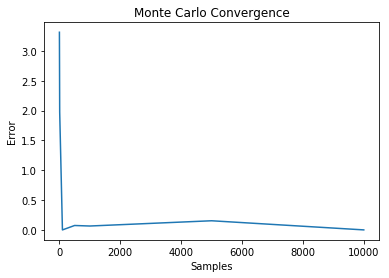

In [6]:
x = [1, 10, 100, 500, 1000, 5000, 10000]
y = [abs(155/6 - MonteCarloInt(0, 1, i, 10, g)) for i in x]

plt.plot(x, y)
plt.xlabel("Samples")
plt.ylabel("Error")
plt.title("Monte Carlo Convergence")
plt.show()

In [7]:
def MonteCarloLowDiscrepInt(a, b, n, g):
    #  Alpha are the roots of the first 10 prime numbers, guaranteeing that each pair is mutually irrational
    alpha = [2 ** 0.5, 3 ** 0.5, 5 ** 0.5, 7 ** 0.5, 11 ** 0.5, 13 ** 0.5, 17 ** 0.5, 19 ** 0.5, 23 ** 0.5, 29 ** 0.5]
    x = [[rand.uniform(a, b) for i in range(10)]]
    for i in range(1, n):
        x.append([(x[i-1][j] + alpha[j]) % 1 for j in range(10)])
    sample = [g(*x[i]) for i in range(n)]
    g_avg = np.mean(sample)
    return ((b-a)**10)*g_avg

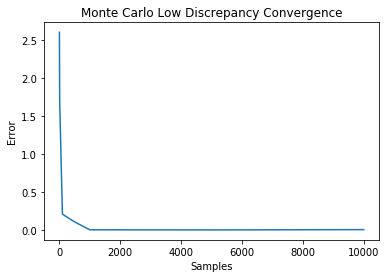

In [8]:
x = [1, 10, 100, 500, 1000, 5000, 10000]
y = [abs(155/6 - MonteCarloLowDiscrepInt(0, 1, i, g)) for i in x]

plt.plot(x, y)
plt.xlabel("Samples")
plt.ylabel("Error")
plt.title("Monte Carlo Low Discrepancy Convergence")
plt.show()

## 3. 1D Integration with importance sampling
We want to evaluate the 1-D integral
$$ I=\int_{0}^\infty dx e^{-x}\cos(4\pi x)$$

1. Write a code to perform this integration with Monte carlo. Use importance sampling, with a sampling distribution $w(x)=\exp(-x)$. In order to do this one needs a method to sample from $w(x)$. One method to obtain samples out of an arbitrary 1-D distribution is to compute the cummulative distribution function (cdf) first, in this case that is $cdf=1-\exp(-x)$. Next one can take uniform samples between $[0,1]$ and invert the mapping from $x$ to the $cdf$, i.e. let's say we take samples $y_i$ we find $x_i$ by solving $y_i=1-\exp(-x_i)$.
If you have trouble with this statement, it's instructive to schetch this out on a piece of paper.
2. Check the precision

In [9]:
def MonteCarloImportanceSamplingInt(a, b, n, f):
    sample = [f(-np.log(1-(rand.uniform(a, b)))) for j in range(n)]
    f_avg = np.mean(sample)
    return (b-a)*f_avg

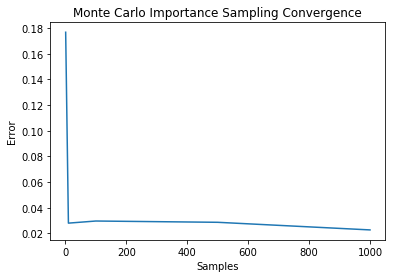

In [11]:
x = [1, 10, 100, 500, 1000]
y = [abs(F(0) - MonteCarloImportanceSamplingInt(0, 1, i, f)) for i in x]

plt.plot(x, y)
plt.xlabel("Samples")
plt.ylabel("Error")
plt.title("Monte Carlo Importance Sampling Convergence")
plt.show()